In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Устанавливаем правильную рабочую директорию
os.chdir('/home/sasamb4ikk/Documents/impl_LSPI/AmericanOptionsPricingApproaches')

# Отладочный вывод
print("Текущая рабочая директория:", os.getcwd())

# Путь к src находится в текущей директории
project_root = os.path.abspath(os.getcwd())  # Текущая директория
src_path = os.path.join(project_root, 'src')
print("Путь к src:", src_path)
print("Существует ли src?:", os.path.exists(src_path))
sys.path.append(src_path)
print("sys.path:", sys.path)

# Импорты
from samplers.geometric_brownian_motion_put_sampler import GeometricBrownianMotionPutSampler
from samplers.wiener_rainbow_put_option_sampler import WienerRainbowPutOptionSampler
from samplers.geometric_brownian_motion_asian_sampler import GeometricBrownianMotionAsianPutSampler
from pricers.american_monte_carlo import AmericanMonteCarloPricer
from pricers.binomial_tree import BinomialTreePricer
from pricers.lspi import LSPIPricer

# Ваш дальнейший код...

Текущая рабочая директория: /home/sasamb4ikk/Documents/impl_LSPI/AmericanOptionsPricingApproaches
Путь к src: /home/sasamb4ikk/Documents/impl_LSPI/AmericanOptionsPricingApproaches/src
Существует ли src?: True
sys.path: ['/home/sasamb4ikk/anaconda3/lib/python311.zip', '/home/sasamb4ikk/anaconda3/lib/python3.11', '/home/sasamb4ikk/anaconda3/lib/python3.11/lib-dynload', '', '/home/sasamb4ikk/anaconda3/lib/python3.11/site-packages', '/home/sasamb4ikk/Documents/impl_LSPI/AmericanOptionsPricingApproaches/src']


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.run.run_pricing import run_pricing_multiple_times

In [4]:
run_pricing_multiple_times(test=True, quiet=True);

Pricing trajectories:   0%|          | 0/10 [00:00<?, ?it/s]

Pricing 1000 / 100000 (0 / 10)


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

Pricing 12000 / 100000 (1 / 10)


AMC price test: 100%|██████████| 364/364 [00:00<00:00, 948.69it/s]


Pricing 23000 / 100000 (2 / 10)


AMC price test: 100%|██████████| 364/364 [00:00<00:00, 671.02it/s]


Pricing 34000 / 100000 (3 / 10)


AMC price test: 100%|██████████| 364/364 [00:00<00:00, 465.29it/s]


Pricing 45000 / 100000 (4 / 10)


AMC price test: 100%|██████████| 364/364 [00:01<00:00, 319.33it/s]


Pricing 56000 / 100000 (5 / 10)


AMC price test: 100%|██████████| 364/364 [00:01<00:00, 250.98it/s]


Pricing 67000 / 100000 (6 / 10)


GBM sampling: 100%|██████████| 364/364 [00:01<00:00, 280.08it/s]

AMC price test: 100%|██████████| 364/364 [00:01<00:00, 192.59it/s]


Pricing 78000 / 100000 (7 / 10)


AMC price test: 100%|██████████| 364/364 [00:02<00:00, 164.53it/s]


Pricing 89000 / 100000 (8 / 10)


AMC price test: 100%|██████████| 364/364 [00:02<00:00, 139.51it/s]


Pricing 100000 / 100000 (9 / 10)


GBM sampling: 100%|██████████| 364/364 [00:02<00:00, 159.86it/s]

AMC price test: 100%|██████████| 364/364 [00:02<00:00, 122.95it/s]


In [11]:
import pickle 
with open("saves/pricing/GeometricBrownianMotionPutSampler_AmericanMonteCarloPricer_10x24.pkl", "rb") as f:
    train_prices, test_prices, cnt_trajectories = pickle.load(f)

In [12]:
train_prices.shape

(24, 10)

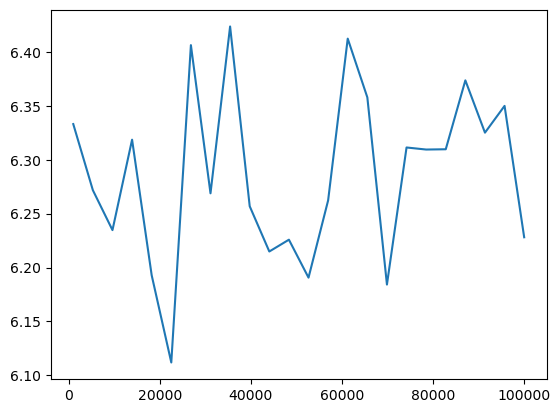

In [13]:
import matplotlib.pyplot as plt
plt.plot(cnt_trajectories, train_prices.mean(axis=1))

# старые отрисовки

In [1]:
import numpy as np

# Пример: 1000 траекторий, 50 моментов времени, 3 актива
num_paths, num_times, d = 1000, 50, 3
S = np.random.rand(num_paths, num_times, d)  # случайные цены
K = 1.0  # страйк

min_S = np.min(S, axis=2)  # минимум по активам
M = min_S / K  # нормализация

print(min_S.shape)  # (1000, 50)
print(M.shape)      # (1000, 50)

(1000, 50)
(1000, 50)


In [3]:
min_S

array([[0.05956871, 0.49625995, 0.07597211, ..., 0.09076812, 0.12761278,
        0.03529936],
       [0.14088064, 0.23311629, 0.34527401, ..., 0.74109362, 0.14110529,
        0.0533414 ],
       [0.11079927, 0.466101  , 0.16703374, ..., 0.39833801, 0.1278648 ,
        0.0287637 ],
       ...,
       [0.23185424, 0.06258961, 0.02627294, ..., 0.09445658, 0.2434709 ,
        0.21395428],
       [0.07329894, 0.36710959, 0.19915678, ..., 0.19790246, 0.48191368,
        0.09353013],
       [0.11915574, 0.25722302, 0.05335934, ..., 0.06426643, 0.78010993,
        0.14808536]])

In [13]:
S.shape

(1000, 50, 3)

In [11]:
a = np.random.randint(1000, 5000, size = (3, 2, 1))

In [12]:
a.ndim

3

# протестируем для одномерного случая (то же, что и было раньше)

In [2]:
def evaluate_pricer_with_std(sampler_class, pricer_class, cnt_traj_list, num_repeats=5, **option_params):
    mean_prices = []
    std_prices = []
    
    for cnt_traj in cnt_traj_list:
        sampler = sampler_class(cnt_trajectories=cnt_traj, **option_params)
        pricer = pricer_class(sampler=sampler)
        prices = []
        
        for _ in range(num_repeats):
            pricer.price(test=False)
            pv_payoffs = pricer.price(test=True)
            price = np.mean(pv_payoffs)
            prices.append(price)
        
        mean_price = np.mean(prices)
        std_price = np.std(prices)
        mean_prices.append(mean_price)
        std_prices.append(std_price)
        print(f"cnt_traj: {cnt_traj}, mean_price: {mean_price}, std_price: {std_price}")
    
    return mean_prices, std_prices

In [3]:
def plot_prices_with_std(cnt_traj_list, mean_prices, std_prices, label='LSPI', reference_price=None):
    plt.figure(figsize=(10, 6))
    plt.plot(cnt_traj_list, mean_prices, label=f'{label} средняя цена')
    plt.fill_between(cnt_traj_list,
                     np.array(mean_prices) - np.array(std_prices),
                     np.array(mean_prices) + np.array(std_prices),
                     alpha=0.3, label=f'{label} стандартное отклонение')
    if reference_price is not None:
        plt.axhline(y=reference_price, color='r', linestyle='--', label='Биномиальная модель')
    plt.xlabel('Количество траекторий')
    plt.ylabel('Цена опциона')
    plt.title('Сходимость цены опциона с учетом стандартного отклонения')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_std_only(cnt_traj_list, std_prices, label='LSPI'):
    plt.figure(figsize=(10, 6))
    plt.plot(cnt_traj_list, std_prices, label=f'{label} стандартное отклонение', color='orange')
    plt.xlabel('Количество траекторий')
    plt.ylabel('Стандартное отклонение цены опциона')
    plt.title('Зависимость стандартного отклонения от количества траекторий')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
option_params = {
    "asset0": 100.0,
    "sigma": 0.2,
    "r": 0.05,
    "strike": 100.0,
    "t": 1.0,
    "cnt_times": 365,
    "seed": None
}

In [5]:
binomial_params = option_params.copy()
binomial_params["cnt_trajectories"] = 1  # Для BinomialTreePricer cnt_trajectories не влияет, но требуется
binomial_sampler = GeometricBrownianMotionPutSampler(**binomial_params)
binomial_pricer = BinomialTreePricer(sampler=binomial_sampler)
binomial_price, _ = binomial_pricer.price(quiet=True)
print(f"Биномиальная цена: {binomial_price}")

Биномиальная цена: 6.093910298972092


In [6]:
cnt_traj_list = list(range(1000, 30_000, 1000))
num_repeats = 5

mean_prices, std_prices = evaluate_pricer_with_std(
    sampler_class=GeometricBrownianMotionPutSampler,
    pricer_class=LSPIPricer,
    cnt_traj_list=cnt_traj_list,
    num_repeats=num_repeats,
    **option_params
)

plot_prices_with_std(cnt_traj_list, mean_prices, std_prices, label='LSPI', reference_price=binomial_price)

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 522.223
на 1-ой итерации норма разности весов составила 1236.782
на 2-ой итерации норма разности весов составила 202.8755
на 3-ой итерации норма разности весов составила 183.3684
на 4-ой итерации норма разности весов составила 232.8662
на 5-ой итерации норма разности весов составила 17.1174
на 6-ой итерации норма разности весов составила 5.4712
на 7-ой итерации норма разности весов составила 1.8632
на 8-ой итерации норма разности весов составила 1.8243
на 9-ой итерации норма разности весов составила 0.7757
на 10-ой итерации норма разности весов составила 0.0189
на 11-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 25.2127
на 1-ой итерации норма разности весов составила 0.9549
на 2-ой итерации норма разности весов составила 1.1915
на 3-ой итерации норма разности весов составила 0.1174
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 26.1898
на 1-ой итерации норма разности весов составила 0.5188
на 2-ой итерации норма разности весов составила 0.0755
на 3-ой итерации норма разности весов составила 0.0002
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 23.6742
на 1-ой итерации норма разности весов составила 0.4945
на 2-ой итерации норма разности весов составила 1.3258
на 3-ой итерации норма разности весов составила 0.1735
на 4-ой итерации норма разности весов составила 0.0003
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.4586
на 1-ой итерации норма разности весов составила 0.3633
на 2-ой итерации норма разности весов составила 0.1431
на 3-ой итерации норма разности весов составила 0.008
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 1000, mean_price: 5.596561856352281, std_price: 0.5174236087593066


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 701.202
на 1-ой итерации норма разности весов составила 1535.3756
на 2-ой итерации норма разности весов составила 208.5564
на 3-ой итерации норма разности весов составила 234.9443
на 4-ой итерации норма разности весов составила 270.1179
на 5-ой итерации норма разности весов составила 21.0159
на 6-ой итерации норма разности весов составила 5.4685
на 7-ой итерации норма разности весов составила 3.3158
на 8-ой итерации норма разности весов составила 2.6908
на 9-ой итерации норма разности весов составила 0.8967
на 10-ой итерации норма разности весов составила 0.0366
на 11-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 13.6957
на 1-ой итерации норма разности весов составила 0.2416
на 2-ой итерации норма разности весов составила 1.7742
на 3-ой итерации норма разности весов составила 0.963
на 4-ой итерации норма разности весов составила 0.822
на 5-ой итерации норма разности весов составила 0.0389
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0
на 8-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 29.0986
на 1-ой итерации норма разности весов составила 0.3164
на 2-ой итерации норма разности весов составила 0.183
на 3-ой итерации норма разности весов составила 0.1079
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 30.3225
на 1-ой итерации норма разности весов составила 3.0465
на 2-ой итерации норма разности весов составила 1.2411
на 3-ой итерации норма разности весов составила 0.047
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.8987
на 1-ой итерации норма разности весов составила 1.9109
на 2-ой итерации норма разности весов составила 0.1988
на 3-ой итерации норма разности весов составила 0.0107
на 4-ой итерации норма разности весов составила 0.0004
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 2000, mean_price: 5.98708563214258, std_price: 0.32177984096755524


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 766.3248
на 1-ой итерации норма разности весов составила 1646.0025
на 2-ой итерации норма разности весов составила 251.9003
на 3-ой итерации норма разности весов составила 187.0384
на 4-ой итерации норма разности весов составила 153.3038
на 5-ой итерации норма разности весов составила 149.9614
на 6-ой итерации норма разности весов составила 7.9934
на 7-ой итерации норма разности весов составила 2.3694
на 8-ой итерации норма разности весов составила 5.5266
на 9-ой итерации норма разности весов составила 1.64
на 10-ой итерации норма разности весов составила 0.0448
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 16.6938
на 1-ой итерации норма разности весов составила 1.0852
на 2-ой итерации норма разности весов составила 1.1811
на 3-ой итерации норма разности весов составила 1.8057
на 4-ой итерации норма разности весов составила 0.3305
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.4275
на 1-ой итерации норма разности весов составила 1.1788
на 2-ой итерации норма разности весов составила 0.1029
на 3-ой итерации норма разности весов составила 0.0001
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 22.2256
на 1-ой итерации норма разности весов составила 0.6717
на 2-ой итерации норма разности весов составила 0.486
на 3-ой итерации норма разности весов составила 0.0892
на 4-ой итерации норма разности весов составила 0.0006
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 23.2903
на 1-ой итерации норма разности весов составила 0.4489
на 2-ой итерации норма разности весов составила 0.872
на 3-ой итерации норма разности весов составила 0.4416
на 4-ой итерации норма разности весов составила 0.2695
на 5-ой итерации норма разности весов составила 0.0036
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 3000, mean_price: 5.8339584199070496, std_price: 0.2525567983538825


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 842.5939
на 1-ой итерации норма разности весов составила 1783.0222
на 2-ой итерации норма разности весов составила 243.1188
на 3-ой итерации норма разности весов составила 213.4445
на 4-ой итерации норма разности весов составила 187.8448
на 5-ой итерации норма разности весов составила 134.8325
на 6-ой итерации норма разности весов составила 9.9901
на 7-ой итерации норма разности весов составила 1.8345
на 8-ой итерации норма разности весов составила 3.0342
на 9-ой итерации норма разности весов составила 0.9586
на 10-ой итерации норма разности весов составила 0.1127
на 11-ой итерации норма разности весов составила 0.0002
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 0.7497
на 1-ой итерации норма разности весов составила 2.4569
на 2-ой итерации норма разности весов составила 1.0186
на 3-ой итерации норма разности весов составила 1.901
на 4-ой итерации норма разности весов составила 0.5724
на 5-ой итерации норма разности весов составила 0.0134
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 15.4688
на 1-ой итерации норма разности весов составила 2.454
на 2-ой итерации норма разности весов составила 1.0199
на 3-ой итерации норма разности весов составила 1.219
на 4-ой итерации норма разности весов составила 1.3261
на 5-ой итерации норма разности весов составила 0.0395
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0
на 8-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 13.4524
на 1-ой итерации норма разности весов составила 3.6435
на 2-ой итерации норма разности весов составила 0.8134
на 3-ой итерации норма разности весов составила 0.017
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.1735
на 1-ой итерации норма разности весов составила 0.7058
на 2-ой итерации норма разности весов составила 0.0067
на 3-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 4000, mean_price: 6.066163011721999, std_price: 0.23957515468589258


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 836.9973
на 1-ой итерации норма разности весов составила 1789.4602
на 2-ой итерации норма разности весов составила 312.4196
на 3-ой итерации норма разности весов составила 180.0323
на 4-ой итерации норма разности весов составила 138.1093
на 5-ой итерации норма разности весов составила 148.5443
на 6-ой итерации норма разности весов составила 13.8231
на 7-ой итерации норма разности весов составила 2.6173
на 8-ой итерации норма разности весов составила 7.4013
на 9-ой итерации норма разности весов составила 2.3359
на 10-ой итерации норма разности весов составила 0.0652
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.4857
на 1-ой итерации норма разности весов составила 1.6512
на 2-ой итерации норма разности весов составила 1.4958
на 3-ой итерации норма разности весов составила 0.7858
на 4-ой итерации норма разности весов составила 0.1939
на 5-ой итерации норма разности весов составила 0.0039
на 6-ой итерации норма разности весов составила 0.0003
на 7-ой итерации норма разности весов составила 0.0001
на 8-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.2715
на 1-ой итерации норма разности весов составила 2.0742
на 2-ой итерации норма разности весов составила 1.0997
на 3-ой итерации норма разности весов составила 0.0297
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 25.6736
на 1-ой итерации норма разности весов составила 11.8353
на 2-ой итерации норма разности весов составила 3.6477
на 3-ой итерации норма разности весов составила 0.3518
на 4-ой итерации норма разности весов составила 0.0063
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.2933
на 1-ой итерации норма разности весов составила 0.6939
на 2-ой итерации норма разности весов составила 0.0123
на 3-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 5000, mean_price: 5.954820822058432, std_price: 0.15532451341363007


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 833.1822
на 1-ой итерации норма разности весов составила 1754.3094
на 2-ой итерации норма разности весов составила 295.8809
на 3-ой итерации норма разности весов составила 164.5076
на 4-ой итерации норма разности весов составила 132.1884
на 5-ой итерации норма разности весов составила 87.0827
на 6-ой итерации норма разности весов составила 25.4726
на 7-ой итерации норма разности весов составила 9.6443
на 8-ой итерации норма разности весов составила 6.0783
на 9-ой итерации норма разности весов составила 0.7514
на 10-ой итерации норма разности весов составила 0.0077
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 16.0717
на 1-ой итерации норма разности весов составила 3.0398
на 2-ой итерации норма разности весов составила 1.5228
на 3-ой итерации норма разности весов составила 0.2479
на 4-ой итерации норма разности весов составила 0.0072
на 5-ой итерации норма разности весов составила 0.0004
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.6507
на 1-ой итерации норма разности весов составила 0.1067
на 2-ой итерации норма разности весов составила 0.9988
на 3-ой итерации норма разности весов составила 0.0357
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.4401
на 1-ой итерации норма разности весов составила 3.1683
на 2-ой итерации норма разности весов составила 0.8
на 3-ой итерации норма разности весов составила 0.3658
на 4-ой итерации норма разности весов составила 0.0049
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.5962
на 1-ой итерации норма разности весов составила 1.2977
на 2-ой итерации норма разности весов составила 2.2643
на 3-ой итерации норма разности весов составила 1.4779
на 4-ой итерации норма разности весов составила 0.9902
на 5-ой итерации норма разности весов составила 0.0268
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 6000, mean_price: 5.989322294583036, std_price: 0.09948402668739381


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 897.602
на 1-ой итерации норма разности весов составила 1632.4096
на 2-ой итерации норма разности весов составила 114.9972
на 3-ой итерации норма разности весов составила 162.9665
на 4-ой итерации норма разности весов составила 146.2303
на 5-ой итерации норма разности весов составила 103.9839
на 6-ой итерации норма разности весов составила 23.7829
на 7-ой итерации норма разности весов составила 2.5924
на 8-ой итерации норма разности весов составила 4.9724
на 9-ой итерации норма разности весов составила 1.2204
на 10-ой итерации норма разности весов составила 0.26
на 11-ой итерации норма разности весов составила 0.0018
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 29.5042
на 1-ой итерации норма разности весов составила 0.8825
на 2-ой итерации норма разности весов составила 0.4426
на 3-ой итерации норма разности весов составила 0.1806
на 4-ой итерации норма разности весов составила 0.0013
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.7611
на 1-ой итерации норма разности весов составила 1.5057
на 2-ой итерации норма разности весов составила 0.2939
на 3-ой итерации норма разности весов составила 0.1365
на 4-ой итерации норма разности весов составила 0.0069
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.8966
на 1-ой итерации норма разности весов составила 0.9653
на 2-ой итерации норма разности весов составила 0.8413
на 3-ой итерации норма разности весов составила 0.3348
на 4-ой итерации норма разности весов составила 0.0232
на 5-ой итерации норма разности весов составила 0.0009
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.0697
на 1-ой итерации норма разности весов составила 4.0741
на 2-ой итерации норма разности весов составила 2.444
на 3-ой итерации норма разности весов составила 1.8644
на 4-ой итерации норма разности весов составила 0.1166
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 7000, mean_price: 5.9327194804113494, std_price: 0.06561519623849864


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 977.6797
на 1-ой итерации норма разности весов составила 1821.518
на 2-ой итерации норма разности весов составила 151.9695
на 3-ой итерации норма разности весов составила 197.67
на 4-ой итерации норма разности весов составила 170.5378
на 5-ой итерации норма разности весов составила 121.3194
на 6-ой итерации норма разности весов составила 10.3908
на 7-ой итерации норма разности весов составила 6.6498
на 8-ой итерации норма разности весов составила 5.3877
на 9-ой итерации норма разности весов составила 0.6622
на 10-ой итерации норма разности весов составила 0.0061
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.0614
на 1-ой итерации норма разности весов составила 2.0881
на 2-ой итерации норма разности весов составила 0.631
на 3-ой итерации норма разности весов составила 0.2398
на 4-ой итерации норма разности весов составила 0.0012
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 0.8412
на 1-ой итерации норма разности весов составила 0.6303
на 2-ой итерации норма разности весов составила 0.6983
на 3-ой итерации норма разности весов составила 0.0403
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.7039
на 1-ой итерации норма разности весов составила 1.4267
на 2-ой итерации норма разности весов составила 0.1965
на 3-ой итерации норма разности весов составила 0.0161
на 4-ой итерации норма разности весов составила 0.001
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.8272
на 1-ой итерации норма разности весов составила 9.3819
на 2-ой итерации норма разности весов составила 3.085
на 3-ой итерации норма разности весов составила 0.3308
на 4-ой итерации норма разности весов составила 0.0051
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 8000, mean_price: 6.0011357942158625, std_price: 0.14709685536393022


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 915.6878
на 1-ой итерации норма разности весов составила 1884.9252
на 2-ой итерации норма разности весов составила 378.0064
на 3-ой итерации норма разности весов составила 151.3509
на 4-ой итерации норма разности весов составила 117.4531
на 5-ой итерации норма разности весов составила 62.017
на 6-ой итерации норма разности весов составила 23.7076
на 7-ой итерации норма разности весов составила 4.2153
на 8-ой итерации норма разности весов составила 8.1955
на 9-ой итерации норма разности весов составила 1.4696
на 10-ой итерации норма разности весов составила 0.1886
на 11-ой итерации норма разности весов составила 0.0003
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.3202
на 1-ой итерации норма разности весов составила 0.4835
на 2-ой итерации норма разности весов составила 0.0128
на 3-ой итерации норма разности весов составила 0.0007
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.9871
на 1-ой итерации норма разности весов составила 3.227
на 2-ой итерации норма разности весов составила 0.5035
на 3-ой итерации норма разности весов составила 0.0242
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.5148
на 1-ой итерации норма разности весов составила 8.865
на 2-ой итерации норма разности весов составила 2.1683
на 3-ой итерации норма разности весов составила 0.846
на 4-ой итерации норма разности весов составила 0.0295
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.3292
на 1-ой итерации норма разности весов составила 1.7874
на 2-ой итерации норма разности весов составила 1.0395
на 3-ой итерации норма разности весов составила 0.6952
на 4-ой итерации норма разности весов составила 0.2288
на 5-ой итерации норма разности весов составила 0.001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 9000, mean_price: 6.032106418385353, std_price: 0.05501793686907007


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 967.5345
на 1-ой итерации норма разности весов составила 1952.6902
на 2-ой итерации норма разности весов составила 312.9583
на 3-ой итерации норма разности весов составила 192.0308
на 4-ой итерации норма разности весов составила 139.3911
на 5-ой итерации норма разности весов составила 80.6793
на 6-ой итерации норма разности весов составила 29.0857
на 7-ой итерации норма разности весов составила 9.5014
на 8-ой итерации норма разности весов составила 8.5187
на 9-ой итерации норма разности весов составила 1.4423
на 10-ой итерации норма разности весов составила 0.0741
на 11-ой итерации норма разности весов составила 0.0021
на 12-ой итерации норма разности весов составила 0.0002
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.2898
на 1-ой итерации норма разности весов составила 6.9343
на 2-ой итерации норма разности весов составила 3.6159
на 3-ой итерации норма разности весов составила 1.054
на 4-ой итерации норма разности весов составила 0.1891
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.6615
на 1-ой итерации норма разности весов составила 0.7543
на 2-ой итерации норма разности весов составила 0.5376
на 3-ой итерации норма разности весов составила 0.1977
на 4-ой итерации норма разности весов составила 0.0019
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.8462
на 1-ой итерации норма разности весов составила 3.5672
на 2-ой итерации норма разности весов составила 2.1741
на 3-ой итерации норма разности весов составила 0.2517
на 4-ой итерации норма разности весов составила 0.0007
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.3728
на 1-ой итерации норма разности весов составила 0.6422
на 2-ой итерации норма разности весов составила 2.6602
на 3-ой итерации норма разности весов составила 2.4476
на 4-ой итерации норма разности весов составила 1.3908
на 5-ой итерации норма разности весов составила 0.1937
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 10000, mean_price: 6.034245715397158, std_price: 0.14693633482561885


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 963.7034
на 1-ой итерации норма разности весов составила 1888.7864
на 2-ой итерации норма разности весов составила 243.0642
на 3-ой итерации норма разности весов составила 194.375
на 4-ой итерации норма разности весов составила 139.8224
на 5-ой итерации норма разности весов составила 90.9128
на 6-ой итерации норма разности весов составила 26.1294
на 7-ой итерации норма разности весов составила 17.2207
на 8-ой итерации норма разности весов составила 9.538
на 9-ой итерации норма разности весов составила 1.6175
на 10-ой итерации норма разности весов составила 0.093
на 11-ой итерации норма разности весов составила 0.0024
на 12-ой итерации норма разности весов составила 0.0002
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.8177
на 1-ой итерации норма разности весов составила 4.039
на 2-ой итерации норма разности весов составила 1.6461
на 3-ой итерации норма разности весов составила 0.2057
на 4-ой итерации норма разности весов составила 0.0024
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 17.2289
на 1-ой итерации норма разности весов составила 1.2439
на 2-ой итерации норма разности весов составила 1.2068
на 3-ой итерации норма разности весов составила 1.404
на 4-ой итерации норма разности весов составила 0.1451
на 5-ой итерации норма разности весов составила 0.0014
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 21.1043
на 1-ой итерации норма разности весов составила 1.2854
на 2-ой итерации норма разности весов составила 0.0646
на 3-ой итерации норма разности весов составила 0.0001
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.7978
на 1-ой итерации норма разности весов составила 6.4107
на 2-ой итерации норма разности весов составила 1.2077
на 3-ой итерации норма разности весов составила 0.1491
на 4-ой итерации норма разности весов составила 0.0014
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 11000, mean_price: 5.966675123443276, std_price: 0.06630457385914337


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 965.4583
на 1-ой итерации норма разности весов составила 1854.9339
на 2-ой итерации норма разности весов составила 214.1164
на 3-ой итерации норма разности весов составила 176.5064
на 4-ой итерации норма разности весов составила 139.3518
на 5-ой итерации норма разности весов составила 92.8485
на 6-ой итерации норма разности весов составила 18.0102
на 7-ой итерации норма разности весов составила 17.5275
на 8-ой итерации норма разности весов составила 8.643
на 9-ой итерации норма разности весов составила 1.1025
на 10-ой итерации норма разности весов составила 0.0182
на 11-ой итерации норма разности весов составила 0.0003
на 12-ой итерации норма разности весов составила 0.0
на 13-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.0133
на 1-ой итерации норма разности весов составила 1.0194
на 2-ой итерации норма разности весов составила 0.007
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.5597
на 1-ой итерации норма разности весов составила 0.8298
на 2-ой итерации норма разности весов составила 0.1026
на 3-ой итерации норма разности весов составила 0.0007
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.8772
на 1-ой итерации норма разности весов составила 1.0466
на 2-ой итерации норма разности весов составила 0.0153
на 3-ой итерации норма разности весов составила 0.0007
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.0169
на 1-ой итерации норма разности весов составила 3.2061
на 2-ой итерации норма разности весов составила 0.2363
на 3-ой итерации норма разности весов составила 0.0014
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 12000, mean_price: 5.990034475123364, std_price: 0.07723076052176188


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 977.4038
на 1-ой итерации норма разности весов составила 1606.2721
на 2-ой итерации норма разности весов составила 64.6517
на 3-ой итерации норма разности весов составила 139.909
на 4-ой итерации норма разности весов составила 123.9935
на 5-ой итерации норма разности весов составила 69.7092
на 6-ой итерации норма разности весов составила 26.8797
на 7-ой итерации норма разности весов составила 7.9397
на 8-ой итерации норма разности весов составила 7.6685
на 9-ой итерации норма разности весов составила 1.2738
на 10-ой итерации норма разности весов составила 0.2529
на 11-ой итерации норма разности весов составила 0.0071
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.0152
на 1-ой итерации норма разности весов составила 4.7922
на 2-ой итерации норма разности весов составила 1.554
на 3-ой итерации норма разности весов составила 1.1905
на 4-ой итерации норма разности весов составила 0.2063
на 5-ой итерации норма разности весов составила 0.0018
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.7232
на 1-ой итерации норма разности весов составила 0.5551
на 2-ой итерации норма разности весов составила 0.0034
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 0.8163
на 1-ой итерации норма разности весов составила 0.2446
на 2-ой итерации норма разности весов составила 0.3338
на 3-ой итерации норма разности весов составила 0.035
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.545
на 1-ой итерации норма разности весов составила 3.9307
на 2-ой итерации норма разности весов составила 0.256
на 3-ой итерации норма разности весов составила 0.005
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 13000, mean_price: 6.028573964825076, std_price: 0.10432268174533198


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 971.3918
на 1-ой итерации норма разности весов составила 1906.2578
на 2-ой итерации норма разности весов составила 284.5991
на 3-ой итерации норма разности весов составила 168.8285
на 4-ой итерации норма разности весов составила 132.4339
на 5-ой итерации норма разности весов составила 65.236
на 6-ой итерации норма разности весов составила 23.6523
на 7-ой итерации норма разности весов составила 17.9669
на 8-ой итерации норма разности весов составила 9.1853
на 9-ой итерации норма разности весов составила 1.0419
на 10-ой итерации норма разности весов составила 0.0181
на 11-ой итерации норма разности весов составила 0.0003
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 17.6528
на 1-ой итерации норма разности весов составила 2.0111
на 2-ой итерации норма разности весов составила 0.0538
на 3-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.074
на 1-ой итерации норма разности весов составила 1.4524
на 2-ой итерации норма разности весов составила 1.2355
на 3-ой итерации норма разности весов составила 0.1745
на 4-ой итерации норма разности весов составила 0.0007
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.9193
на 1-ой итерации норма разности весов составила 1.3967
на 2-ой итерации норма разности весов составила 1.273
на 3-ой итерации норма разности весов составила 1.1117
на 4-ой итерации норма разности весов составила 0.1502
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.9785
на 1-ой итерации норма разности весов составила 2.3874
на 2-ой итерации норма разности весов составила 0.1223
на 3-ой итерации норма разности весов составила 0.0695
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 14000, mean_price: 6.008752083532082, std_price: 0.06746343978364674


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 968.2452
на 1-ой итерации норма разности весов составила 1835.3243
на 2-ой итерации норма разности весов составила 299.5746
на 3-ой итерации норма разности весов составила 169.3491
на 4-ой итерации норма разности весов составила 110.2808
на 5-ой итерации норма разности весов составила 45.8022
на 6-ой итерации норма разности весов составила 2.6892
на 7-ой итерации норма разности весов составила 5.3908
на 8-ой итерации норма разности весов составила 5.485
на 9-ой итерации норма разности весов составила 0.8542
на 10-ой итерации норма разности весов составила 0.0724
на 11-ой итерации норма разности весов составила 0.0021
на 12-ой итерации норма разности весов составила 0.0002
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 31.0982
на 1-ой итерации норма разности весов составила 9.6502
на 2-ой итерации норма разности весов составила 1.7864
на 3-ой итерации норма разности весов составила 0.0724
на 4-ой итерации норма разности весов составила 0.0014
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.7221
на 1-ой итерации норма разности весов составила 0.1738
на 2-ой итерации норма разности весов составила 0.0955
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.4392
на 1-ой итерации норма разности весов составила 1.3028
на 2-ой итерации норма разности весов составила 1.0809
на 3-ой итерации норма разности весов составила 0.0482
на 4-ой итерации норма разности весов составила 0.0001
на 5-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.3766
на 1-ой итерации норма разности весов составила 0.2067
на 2-ой итерации норма разности весов составила 0.0074
на 3-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 15000, mean_price: 6.042283755746772, std_price: 0.09840444360758278


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 961.6052
на 1-ой итерации норма разности весов составила 1891.6451
на 2-ой итерации норма разности весов составила 264.5256
на 3-ой итерации норма разности весов составила 186.162
на 4-ой итерации норма разности весов составила 135.6565
на 5-ой итерации норма разности весов составила 65.8965
на 6-ой итерации норма разности весов составила 11.0381
на 7-ой итерации норма разности весов составила 14.1084
на 8-ой итерации норма разности весов составила 8.6462
на 9-ой итерации норма разности весов составила 1.3657
на 10-ой итерации норма разности весов составила 0.0875
на 11-ой итерации норма разности весов составила 0.0027
на 12-ой итерации норма разности весов составила 0.0003
на 13-ой итерации норма разности весов составила 0.0
на 14-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.9625
на 1-ой итерации норма разности весов составила 1.3774
на 2-ой итерации норма разности весов составила 2.0266
на 3-ой итерации норма разности весов составила 0.3865
на 4-ой итерации норма разности весов составила 0.0172
на 5-ой итерации норма разности весов составила 0.0007
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.9277
на 1-ой итерации норма разности весов составила 0.2344
на 2-ой итерации норма разности весов составила 1.5823
на 3-ой итерации норма разности весов составила 1.5527
на 4-ой итерации норма разности весов составила 0.4072
на 5-ой итерации норма разности весов составила 0.0472
на 6-ой итерации норма разности весов составила 0.0006
на 7-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 13.6554
на 1-ой итерации норма разности весов составила 6.7515
на 2-ой итерации норма разности весов составила 2.7175
на 3-ой итерации норма разности весов составила 0.517
на 4-ой итерации норма разности весов составила 0.0671
на 5-ой итерации норма разности весов составила 0.0002
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 20.8997
на 1-ой итерации норма разности весов составила 0.7058
на 2-ой итерации норма разности весов составила 0.3039
на 3-ой итерации норма разности весов составила 0.0116
на 4-ой итерации норма разности весов составила 0.0002
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 16000, mean_price: 6.0201600633256005, std_price: 0.11541315529913554


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 976.9178
на 1-ой итерации норма разности весов составила 1963.3798
на 2-ой итерации норма разности весов составила 333.4804
на 3-ой итерации норма разности весов составила 180.5562
на 4-ой итерации норма разности весов составила 142.0592
на 5-ой итерации норма разности весов составила 68.4446
на 6-ой итерации норма разности весов составила 2.5151
на 7-ой итерации норма разности весов составила 7.2013
на 8-ой итерации норма разности весов составила 7.913
на 9-ой итерации норма разности весов составила 1.6531
на 10-ой итерации норма разности весов составила 0.2956
на 11-ой итерации норма разности весов составила 0.0006
на 12-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.4318
на 1-ой итерации норма разности весов составила 4.8461
на 2-ой итерации норма разности весов составила 0.54
на 3-ой итерации норма разности весов составила 0.1118
на 4-ой итерации норма разности весов составила 0.0032
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.1292
на 1-ой итерации норма разности весов составила 1.548
на 2-ой итерации норма разности весов составила 1.5532
на 3-ой итерации норма разности весов составила 0.7694
на 4-ой итерации норма разности весов составила 0.1162
на 5-ой итерации норма разности весов составила 0.0011
на 6-ой итерации норма разности весов составила 0.0001
на 7-ой итерации норма разности весов составила 0.0


KeyboardInterrupt: 

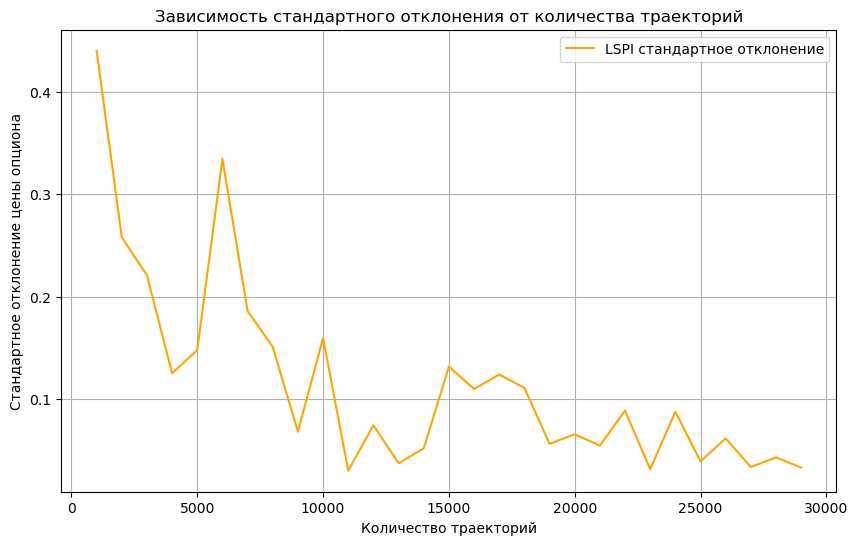

In [8]:
plot_std_only(cnt_traj_list, std_prices)

# протестируем для многомерного (rainbow) случая

In [7]:
rainbow_option_params = {
    "sigmas": [0.2, 0.25],
    "asset0": [100.0, 100.0], 
    "strike": 110.0,
    "r": 0.05,
    "t": 1.0,
    "cnt_times": 365,
    "seed": None
}

In [8]:
reference_params = rainbow_option_params.copy()
reference_params["cnt_trajectories"] = 100_000
reference_sampler = WienerRainbowPutOptionSampler(**reference_params)
reference_pricer = AmericanMonteCarloPricer(sampler=reference_sampler)
reference_price_history = reference_pricer.price(quiet=True)
reference_price = reference_pricer.result["train"]["price"]
print(f"Эталонная цена (AMC): {reference_price}")

WienerRainbow sampling with asset0:   0%|          | 0/100000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/100000 [00:00<?, ?it/s]

AMC price train:   0%|          | 0/364 [00:00<?, ?it/s]

Эталонная цена (AMC): 20.69413291952456


In [9]:
cnt_traj_list = list(range(1000, 30_000, 1000))
num_repeats = 5

mean_prices_rainbow, std_prices_rainbow = evaluate_pricer_with_std(
    sampler_class=WienerRainbowPutOptionSampler,
    pricer_class=LSPIPricer,
    cnt_traj_list=cnt_traj_list,
    num_repeats=num_repeats,
    **rainbow_option_params
)

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 128.9447
на 1-ой итерации норма разности весов составила 714.5937
на 2-ой итерации норма разности весов составила 636.746
на 3-ой итерации норма разности весов составила 145.77
на 4-ой итерации норма разности весов составила 52.6339
на 5-ой итерации норма разности весов составила 23.5093
на 6-ой итерации норма разности весов составила 4.6956
на 7-ой итерации норма разности весов составила 0.918
на 8-ой итерации норма разности весов составила 1.1336
на 9-ой итерации норма разности весов составила 0.1887
на 10-ой итерации норма разности весов составила 0.0001
на 11-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.9447
на 1-ой итерации норма разности весов составила 1.2239
на 2-ой итерации норма разности весов составила 0.3972
на 3-ой итерации норма разности весов составила 0.0885
на 4-ой итерации норма разности весов составила 0.0009
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.0009
на 1-ой итерации норма разности весов составила 4.3526
на 2-ой итерации норма разности весов составила 5.7279
на 3-ой итерации норма разности весов составила 0.9459
на 4-ой итерации норма разности весов составила 0.1466
на 5-ой итерации норма разности весов составила 0.0217
на 6-ой итерации норма разности весов составила 0.0007
на 7-ой итерации норма разности весов составила 0.0001
на 8-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 23.06
на 1-ой итерации норма разности весов составила 10.3856
на 2-ой итерации норма разности весов составила 3.2308
на 3-ой итерации норма разности весов составила 1.5562
на 4-ой итерации норма разности весов составила 0.3925
на 5-ой итерации норма разности весов составила 0.0016
на 6-ой итерации норма разности весов составила 0.0
на 7-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 13.6098
на 1-ой итерации норма разности весов составила 1.0554
на 2-ой итерации норма разности весов составила 0.3365
на 3-ой итерации норма разности весов составила 0.0164
на 4-ой итерации норма разности весов составила 0.0007
на 5-ой итерации норма разности весов составила 0.0
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/1000 [00:00<?, ?it/s]

cnt_traj: 1000, mean_price: 20.421129638994316, std_price: 0.18084418819990974


WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 164.7755
на 1-ой итерации норма разности весов составила 871.9534
на 2-ой итерации норма разности весов составила 466.1546
на 3-ой итерации норма разности весов составила 476.7729
на 4-ой итерации норма разности весов составила 85.6773
на 5-ой итерации норма разности весов составила 21.2171
на 6-ой итерации норма разности весов составила 14.0685
на 7-ой итерации норма разности весов составила 0.6989
на 8-ой итерации норма разности весов составила 1.6945
на 9-ой итерации норма разности весов составила 0.1982
на 10-ой итерации норма разности весов составила 0.0017
на 11-ой итерации норма разности весов составила 0.0001
на 12-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.1457
на 1-ой итерации норма разности весов составила 0.9579
на 2-ой итерации норма разности весов составила 1.2654
на 3-ой итерации норма разности весов составила 0.2394
на 4-ой итерации норма разности весов составила 0.0029
на 5-ой итерации норма разности весов составила 0.0001
на 6-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.2244
на 1-ой итерации норма разности весов составила 0.2723
на 2-ой итерации норма разности весов составила 0.0616
на 3-ой итерации норма разности весов составила 0.0017
на 4-ой итерации норма разности весов составила 0.0
на 5-ой итерации норма разности весов составила 0.0


WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

WienerRainbow sampling with asset0:   0%|          | 0/2000 [00:00<?, ?it/s]

KeyboardInterrupt: 

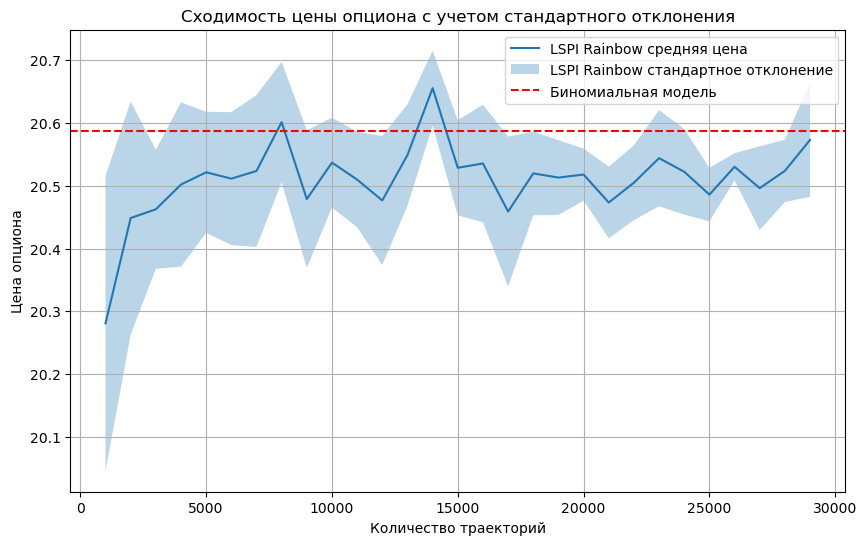

In [17]:
plot_prices_with_std(cnt_traj_list, mean_prices_rainbow, std_prices_rainbow, 
                     label='LSPI Rainbow', reference_price=reference_price)

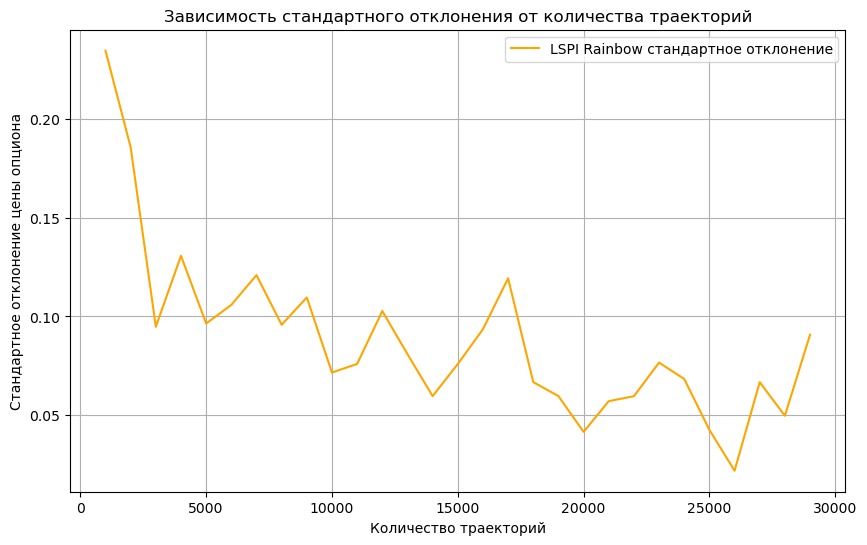

In [18]:
plot_std_only(cnt_traj_list, std_prices_rainbow, label='LSPI Rainbow')

## Азиатский и многомерный `state` в `LSPI`

In [10]:
asian_option_params = {
    "asset0": 100.0,
    "sigma": 0.2,
    "r": 0.05,
    "strike": 100.0,
    "t": 1.0,
    "cnt_times": 365,
    "seed": None
}

In [11]:
reference_params = asian_option_params.copy()
reference_params["cnt_trajectories"] = 100_000
reference_sampler = GeometricBrownianMotionAsianPutSampler(**reference_params)
reference_pricer = AmericanMonteCarloPricer(sampler=reference_sampler)
reference_price_history = reference_pricer.price(quiet=True)
reference_price = reference_pricer.result["train"]["price"]
print(f"Эталонная цена (AMC для Asian Put): {reference_price}")

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

AMC price train:   0%|          | 0/364 [00:00<?, ?it/s]

Эталонная цена (AMC для Asian Put): 4.039644659249785


In [ ]:
cnt_traj_list = list(range(1000, 30_000, 1000))
num_repeats = 5

mean_prices_asian, std_prices_asian = evaluate_pricer_with_std(
    sampler_class=GeometricBrownianMotionAsianPutSampler,
    pricer_class=LSPIPricer,
    cnt_traj_list=cnt_traj_list,
    num_repeats=num_repeats,
    **asian_option_params
)

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 74.8776
на 1-ой итерации норма разности весов составила 347.052
на 2-ой итерации норма разности весов составила 233.1463
на 3-ой итерации норма разности весов составила 121.3162
на 4-ой итерации норма разности весов составила 3.9114
на 5-ой итерации норма разности весов составила 13.3519
на 6-ой итерации норма разности весов составила 8.9136
на 7-ой итерации норма разности весов составила 3.2793
на 8-ой итерации норма разности весов составила 0.1201
на 9-ой итерации норма разности весов составила 0.0003
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.8824
на 1-ой итерации норма разности весов составила 0.1949
на 2-ой итерации норма разности весов составила 0.0003
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.9112
на 1-ой итерации норма разности весов составила 1.4376
на 2-ой итерации норма разности весов составила 0.0143
на 3-ой итерации норма разности весов составила 0.0001
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.1736
на 1-ой итерации норма разности весов составила 1.5525
на 2-ой итерации норма разности весов составила 0.0717
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.7237
на 1-ой итерации норма разности весов составила 0.3135
на 2-ой итерации норма разности весов составила 0.1191
на 3-ой итерации норма разности весов составила 0.0004
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 1000, mean_price: 3.266621400782126, std_price: 0.1463956618352662


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 54.1311
на 1-ой итерации норма разности весов составила 469.7178
на 2-ой итерации норма разности весов составила 194.1115
на 3-ой итерации норма разности весов составила 188.3354
на 4-ой итерации норма разности весов составила 18.9251
на 5-ой итерации норма разности весов составила 36.3873
на 6-ой итерации норма разности весов составила 11.7825
на 7-ой итерации норма разности весов составила 2.7298
на 8-ой итерации норма разности весов составила 0.0991
на 9-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 7.6915
на 1-ой итерации норма разности весов составила 1.5719
на 2-ой итерации норма разности весов составила 0.1888
на 3-ой итерации норма разности весов составила 0.0006
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.8627
на 1-ой итерации норма разности весов составила 0.5488
на 2-ой итерации норма разности весов составила 0.0009
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.0016
на 1-ой итерации норма разности весов составила 0.0939
на 2-ой итерации норма разности весов составила 0.0004
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.96
на 1-ой итерации норма разности весов составила 1.1359
на 2-ой итерации норма разности весов составила 0.0061
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 2000, mean_price: 3.3750264603656475, std_price: 0.1647730262563224


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 111.9627
на 1-ой итерации норма разности весов составила 332.8561
на 2-ой итерации норма разности весов составила 80.0269
на 3-ой итерации норма разности весов составила 164.3661
на 4-ой итерации норма разности весов составила 35.9437
на 5-ой итерации норма разности весов составила 38.2949
на 6-ой итерации норма разности весов составила 9.6327
на 7-ой итерации норма разности весов составила 8.6489
на 8-ой итерации норма разности весов составила 0.3786
на 9-ой итерации норма разности весов составила 0.0006
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.9026
на 1-ой итерации норма разности весов составила 1.2631
на 2-ой итерации норма разности весов составила 0.0069
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.5661
на 1-ой итерации норма разности весов составила 0.2836
на 2-ой итерации норма разности весов составила 0.0005
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.6292
на 1-ой итерации норма разности весов составила 0.3019
на 2-ой итерации норма разности весов составила 0.0011
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.9437
на 1-ой итерации норма разности весов составила 0.5011
на 2-ой итерации норма разности весов составила 0.0049
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 3000, mean_price: 3.3286022417373546, std_price: 0.04585713397580681


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 159.968
на 1-ой итерации норма разности весов составила 293.4319
на 2-ой итерации норма разности весов составила 24.7888
на 3-ой итерации норма разности весов составила 173.8837
на 4-ой итерации норма разности весов составила 52.7958
на 5-ой итерации норма разности весов составила 45.7238
на 6-ой итерации норма разности весов составила 10.6371
на 7-ой итерации норма разности весов составила 12.0573
на 8-ой итерации норма разности весов составила 0.5709
на 9-ой итерации норма разности весов составила 0.005
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.0713
на 1-ой итерации норма разности весов составила 0.2374
на 2-ой итерации норма разности весов составила 0.0026
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.7562
на 1-ой итерации норма разности весов составила 0.6154
на 2-ой итерации норма разности весов составила 0.0135
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.409
на 1-ой итерации норма разности весов составила 2.5318
на 2-ой итерации норма разности весов составила 0.0795
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 35.0468
на 1-ой итерации норма разности весов составила 4.7416
на 2-ой итерации норма разности весов составила 0.3441
на 3-ой итерации норма разности весов составила 0.0003
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 4000, mean_price: 3.3795677464836964, std_price: 0.08615556649810692


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 182.2851
на 1-ой итерации норма разности весов составила 443.7045
на 2-ой итерации норма разности весов составила 36.0148
на 3-ой итерации норма разности весов составила 238.0535
на 4-ой итерации норма разности весов составила 72.3268
на 5-ой итерации норма разности весов составила 62.979
на 6-ой итерации норма разности весов составила 11.5369
на 7-ой итерации норма разности весов составила 13.481
на 8-ой итерации норма разности весов составила 0.7691
на 9-ой итерации норма разности весов составила 0.0033
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 20.9871
на 1-ой итерации норма разности весов составила 0.3038
на 2-ой итерации норма разности весов составила 0.0006
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.5335
на 1-ой итерации норма разности весов составила 0.215
на 2-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 14.6292
на 1-ой итерации норма разности весов составила 1.7915
на 2-ой итерации норма разности весов составила 0.0059
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 22.219
на 1-ой итерации норма разности весов составила 1.1286
на 2-ой итерации норма разности весов составила 0.0089
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 5000, mean_price: 3.3101521923883923, std_price: 0.030807007794161415


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 40.8261
на 1-ой итерации норма разности весов составила 455.3274
на 2-ой итерации норма разности весов составила 53.9588
на 3-ой итерации норма разности весов составила 175.2299
на 4-ой итерации норма разности весов составила 94.4514
на 5-ой итерации норма разности весов составила 74.2671
на 6-ой итерации норма разности весов составила 13.1207
на 7-ой итерации норма разности весов составила 15.2801
на 8-ой итерации норма разности весов составила 0.8861
на 9-ой итерации норма разности весов составила 0.004
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 19.9203
на 1-ой итерации норма разности весов составила 0.1808
на 2-ой итерации норма разности весов составила 0.004
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.1831
на 1-ой итерации норма разности весов составила 0.979
на 2-ой итерации норма разности весов составила 0.0008
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.9649
на 1-ой итерации норма разности весов составила 0.2801
на 2-ой итерации норма разности весов составила 0.0001
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.5654
на 1-ой итерации норма разности весов составила 0.3947
на 2-ой итерации норма разности весов составила 0.0005
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 6000, mean_price: 3.3803282160708656, std_price: 0.04680426496855062


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 192.6058
на 1-ой итерации норма разности весов составила 405.4867
на 2-ой итерации норма разности весов составила 42.0832
на 3-ой итерации норма разности весов составила 217.1418
на 4-ой итерации норма разности весов составила 90.9639
на 5-ой итерации норма разности весов составила 55.1725
на 6-ой итерации норма разности весов составила 17.3125
на 7-ой итерации норма разности весов составила 18.3364
на 8-ой итерации норма разности весов составила 1.159
на 9-ой итерации норма разности весов составила 0.006
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.8756
на 1-ой итерации норма разности весов составила 0.3391
на 2-ой итерации норма разности весов составила 0.0005
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 32.7218
на 1-ой итерации норма разности весов составила 0.1926
на 2-ой итерации норма разности весов составила 0.001
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 32.1041
на 1-ой итерации норма разности весов составила 0.3763
на 2-ой итерации норма разности весов составила 0.0085
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 15.2095
на 1-ой итерации норма разности весов составила 2.0115
на 2-ой итерации норма разности весов составила 0.017
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 7000, mean_price: 3.3205434223998216, std_price: 0.034169789338896854


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 74.4458
на 1-ой итерации норма разности весов составила 414.2979
на 2-ой итерации норма разности весов составила 106.2838
на 3-ой итерации норма разности весов составила 141.1248
на 4-ой итерации норма разности весов составила 97.4623
на 5-ой итерации норма разности весов составила 72.9782
на 6-ой итерации норма разности весов составила 10.0877
на 7-ой итерации норма разности весов составила 15.8638
на 8-ой итерации норма разности весов составила 0.9084
на 9-ой итерации норма разности весов составила 0.0028
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 6.7868
на 1-ой итерации норма разности весов составила 2.9196
на 2-ой итерации норма разности весов составила 0.016
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.6008
на 1-ой итерации норма разности весов составила 1.0791
на 2-ой итерации норма разности весов составила 0.0042
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.6906
на 1-ой итерации норма разности весов составила 1.4946
на 2-ой итерации норма разности весов составила 0.0009
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.0639
на 1-ой итерации норма разности весов составила 0.7098
на 2-ой итерации норма разности весов составила 0.0016
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 8000, mean_price: 3.326580077639517, std_price: 0.0593934293221464


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 148.7066
на 1-ой итерации норма разности весов составила 402.3187
на 2-ой итерации норма разности весов составила 87.6037
на 3-ой итерации норма разности весов составила 172.8618
на 4-ой итерации норма разности весов составила 104.7128
на 5-ой итерации норма разности весов составила 72.678
на 6-ой итерации норма разности весов составила 13.9695
на 7-ой итерации норма разности весов составила 17.1704
на 8-ой итерации норма разности весов составила 0.8477
на 9-ой итерации норма разности весов составила 0.0057
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 11.1233
на 1-ой итерации норма разности весов составила 0.1815
на 2-ой итерации норма разности весов составила 0.0001
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 4.1553
на 1-ой итерации норма разности весов составила 1.3595
на 2-ой итерации норма разности весов составила 0.007
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.6177
на 1-ой итерации норма разности весов составила 0.0337
на 2-ой итерации норма разности весов составила 0.0003
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 0.9407
на 1-ой итерации норма разности весов составила 0.2548
на 2-ой итерации норма разности весов составила 0.0021
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 9000, mean_price: 3.3844288978171946, std_price: 0.04909800881723067


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 246.262
на 1-ой итерации норма разности весов составила 327.7133
на 2-ой итерации норма разности весов составила 70.8671
на 3-ой итерации норма разности весов составила 151.2327
на 4-ой итерации норма разности весов составила 97.4273
на 5-ой итерации норма разности весов составила 78.7621
на 6-ой итерации норма разности весов составила 12.2849
на 7-ой итерации норма разности весов составила 20.7802
на 8-ой итерации норма разности весов составила 1.1455
на 9-ой итерации норма разности весов составила 0.0093
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 17.9171
на 1-ой итерации норма разности весов составила 4.6366
на 2-ой итерации норма разности весов составила 0.0492
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 37.196
на 1-ой итерации норма разности весов составила 3.7827
на 2-ой итерации норма разности весов составила 0.0549
на 3-ой итерации норма разности весов составила 0.0
на 4-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 22.3001
на 1-ой итерации норма разности весов составила 0.1418
на 2-ой итерации норма разности весов составила 0.0002
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 12.4036
на 1-ой итерации норма разности весов составила 0.0315
на 2-ой итерации норма разности весов составила 0.0007
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 10000, mean_price: 3.3934602269374756, std_price: 0.023090411074799866


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 202.164
на 1-ой итерации норма разности весов составила 375.5028
на 2-ой итерации норма разности весов составила 105.7374
на 3-ой итерации норма разности весов составила 139.8341
на 4-ой итерации норма разности весов составила 114.0273
на 5-ой итерации норма разности весов составила 83.6045
на 6-ой итерации норма разности весов составила 11.2722
на 7-ой итерации норма разности весов составила 18.5974
на 8-ой итерации норма разности весов составила 1.1759
на 9-ой итерации норма разности весов составила 0.0041
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 9.7541
на 1-ой итерации норма разности весов составила 0.1689
на 2-ой итерации норма разности весов составила 0.0001
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 0.6805
на 1-ой итерации норма разности весов составила 0.0442
на 2-ой итерации норма разности весов составила 0.0002
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 13.0959
на 1-ой итерации норма разности весов составила 0.4124
на 2-ой итерации норма разности весов составила 0.0002
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 3.5015
на 1-ой итерации норма разности весов составила 0.6682
на 2-ой итерации норма разности весов составила 0.0
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 11000, mean_price: 3.3502014326786123, std_price: 0.04008820139886128


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 160.4652
на 1-ой итерации норма разности весов составила 424.5816
на 2-ой итерации норма разности весов составила 112.7356
на 3-ой итерации норма разности весов составила 120.6812
на 4-ой итерации норма разности весов составила 129.8046
на 5-ой итерации норма разности весов составила 97.8771
на 6-ой итерации норма разности весов составила 14.7254
на 7-ой итерации норма разности весов составила 18.0644
на 8-ой итерации норма разности весов составила 0.8504
на 9-ой итерации норма разности весов составила 0.0052
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 2.5451
на 1-ой итерации норма разности весов составила 1.3041
на 2-ой итерации норма разности весов составила 0.0025
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 19.7673
на 1-ой итерации норма разности весов составила 1.6898
на 2-ой итерации норма разности весов составила 0.01
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 24.5453
на 1-ой итерации норма разности весов составила 0.2511
на 2-ой итерации норма разности весов составила 0.0039
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 5.1129
на 1-ой итерации норма разности весов составила 0.6233
на 2-ой итерации норма разности весов составила 0.0007
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

cnt_traj: 12000, mean_price: 3.3500808812090606, std_price: 0.03179630195910719


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 195.6935
на 1-ой итерации норма разности весов составила 366.9203
на 2-ой итерации норма разности весов составила 122.8488
на 3-ой итерации норма разности весов составила 98.2004
на 4-ой итерации норма разности весов составила 106.1196
на 5-ой итерации норма разности весов составила 94.7649
на 6-ой итерации норма разности весов составила 11.4708
на 7-ой итерации норма разности весов составила 19.8894
на 8-ой итерации норма разности весов составила 0.9374
на 9-ой итерации норма разности весов составила 0.0063
на 10-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 8.8258
на 1-ой итерации норма разности весов составила 1.2469
на 2-ой итерации норма разности весов составила 0.0032
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 1.372
на 1-ой итерации норма разности весов составила 0.1048
на 2-ой итерации норма разности весов составила 0.0008
на 3-ой итерации норма разности весов составила 0.0


GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

GBM sampling for Asian American put:   0%|          | 0/364 [00:00<?, ?it/s]

на 0-ой итерации норма разности весов составила 10.4121
на 1-ой итерации норма разности весов составила 0.5594
